In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
from landlab import RasterModelGrid
from plume import Plume

# Run a 2D Plume

Create a grid on which we will solve for sediment concentrations of the hypopycnal plume

In [3]:
grid = RasterModelGrid((500, 500), xy_spacing=(100.0, 100.0))

Set input parameters for the plume. Units are MKS.

In [4]:
params = {
    "river_velocity": 1.5,
    "river_width": 50.0,
    "river_depth": 5.0,
    "river_loc": (0.0, 25000.0),
    "ocean_velocity": 0.015,
    "river_angle": np.deg2rad(0.0),
}

Create an instance of a plume and solve.

In [5]:
plume = Plume(grid, **params)
plume.run_one_step()

1.5 50.0 5.0 0.015


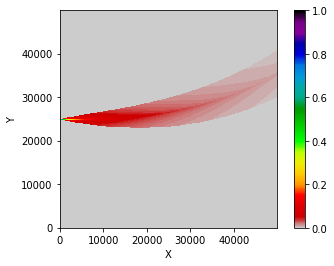

In [6]:
grid.imshow("node", "sediment~suspended__mass_concentration", cmap="nipy_spectral_r")

# Run a 1D Plume

Create a "1D" grid.

In [21]:
grid = RasterModelGrid((3, 500), xy_spacing=(100.0, 10000.0))

In [22]:
params = {
    "river_velocity": 1.5,
    "river_width": 50.0,
    "river_depth": 5.0,
    "river_loc": (0.0, 10000.0),
    "ocean_velocity": 0.0,
    "river_angle": np.deg2rad(0.0),
}

In [23]:
plume = Plume(grid, **params)
plume.run_one_step()

Plot concentrations alongs the centerline. Because the grid has three rows of nodes, plot the middle row for the "centerline".

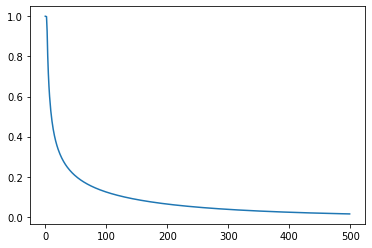

In [24]:
plt.plot(grid.at_node["sediment~suspended__mass_concentration"].reshape((3, -1))[1])